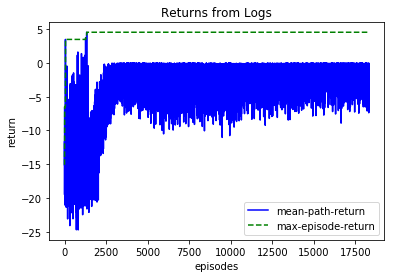

In [41]:
import glob
import os.path
import numpy as np

folder_path = r'../log/diff-ma_softq/2/MASQL_MASQL'
file_type = '/*csv'
files = glob.glob(folder_path + file_type)
max_file = max(files, key=os.path.getctime)

import pandas as pd
df = pd.read_csv (max_file)

mean_0=np.array(df['mean-path-return_agent_0'])
mean_1=np.array(df['mean-path-return_agent_1'])
max_0=np.array(df['max-path-return_agent_0'])
max_1=np.array(df['max-path-return_agent_1'])
episode=np.array(df['episodes'])

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("episodes")
plt.ylabel("return")
plt.title("Returns from Logs")
plt.plot(episode, (mean_0),color='blue',label='mean-path-return')
plt.plot(episode,max_0, color='green', linestyle="--",label="max-episode-return")
plt.legend()
plt.show()




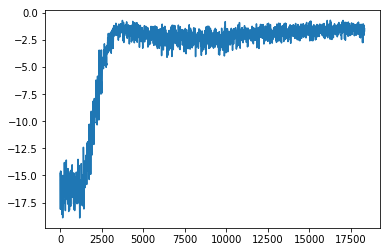

In [42]:
import pylab as plt
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(mean_0, episode, frac=0.001)

#plt.plot(episode, mean_0, '+')
plt.plot(lowess[:, 0], lowess[:, 1])
plt.show()
